In [53]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random
import hdbscan

from sklearn.decomposition import MiniBatchDictionaryLearning

In [147]:
data = np.load("images_algae.npy", allow_pickle = True)
data = np.concatenate(data)
data = data.reshape(data.shape[0], -1)
M = np.expand_dims(np.mean(data, axis=1),-1)
S = np.expand_dims(np.std(data, axis = 1), -1)
data -= M
data /= S

(419, 3600)


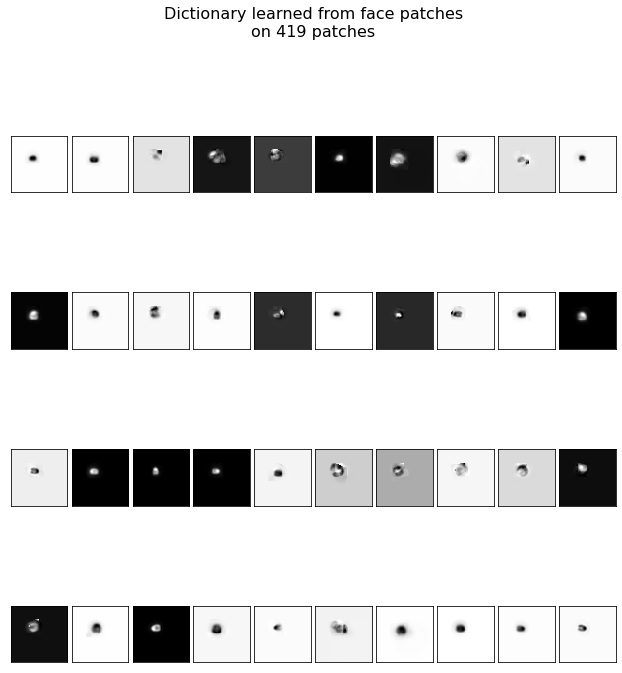

In [360]:
for k in [40]:
    dico = MiniBatchDictionaryLearning(n_components=k, alpha=10, n_iter=250, fit_algorithm="lars", random_state = 1)
    print(data.shape)
    V = dico.fit(data).components_
    
    plt.figure(figsize=(10, 10))
    for i, comp in enumerate(V):
        plt.subplot(k//10, 10, i + 1)
        plt.imshow(comp.reshape((60, 60)), cmap=plt.cm.gray_r, interpolation="nearest")
        plt.xticks(())
        plt.yticks(())
    plt.suptitle(
        "Dictionary learned from face patches\n"
        + "on %d patches" % (len(data)),
        fontsize=16,
    )
    plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)



In [218]:
transform_algorithm = "lars"#"threshold"
kwargs =  {"transform_n_nonzero_coefs": 10}#{"transform_alpha":0.1}
dico.set_params(transform_algorithm=transform_algorithm, **kwargs) 
code = dico.transform(data)
dic_items = np.dot(code, V)
dic_items.shape

(419, 3600)

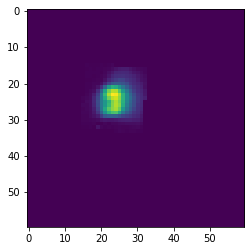

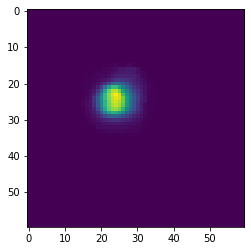

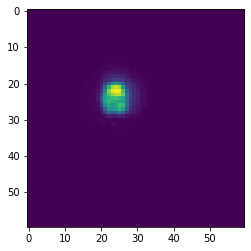

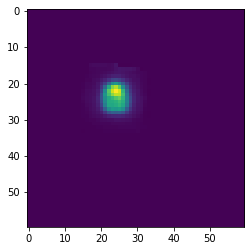

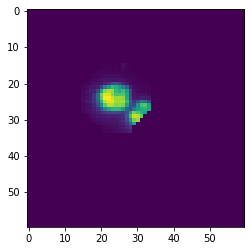

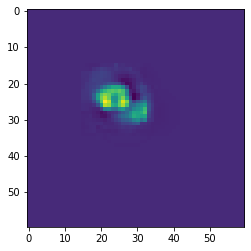

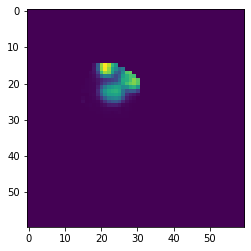

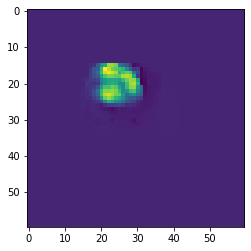

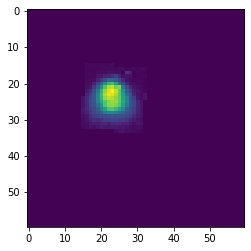

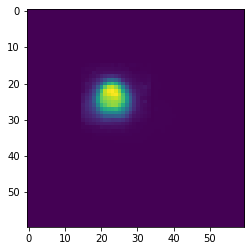

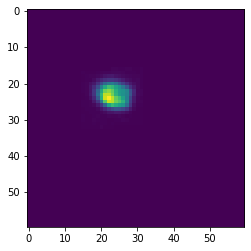

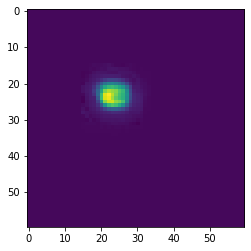

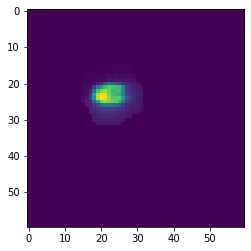

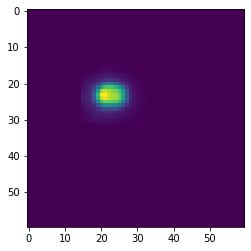

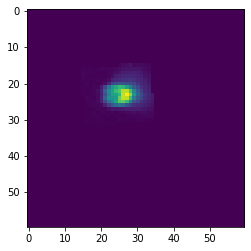

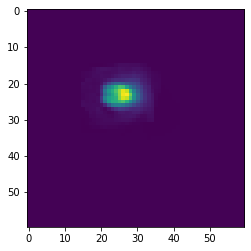

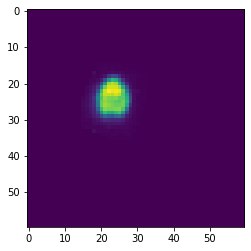

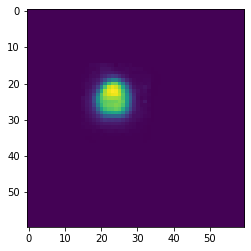

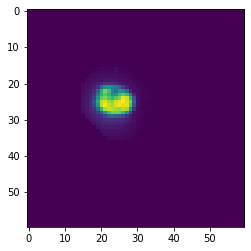

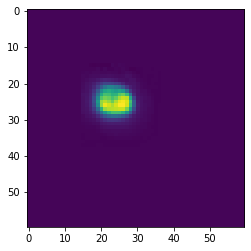

In [219]:
for i in range(10):
    k = random.randint(0, 400)
    plt.figure()
    plt.imshow(data[k].reshape((60,60)))
    plt.figure()
    plt.imshow(dic_items[k].reshape((60,60)))

0.8815930787589499


<Figure size 432x288 with 0 Axes>

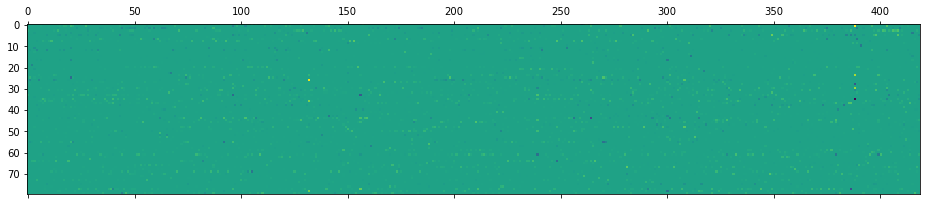

In [220]:
plt.figure()
plt.matshow(code.T)
print(np.mean(code==0))

In [339]:
len(labels)

7

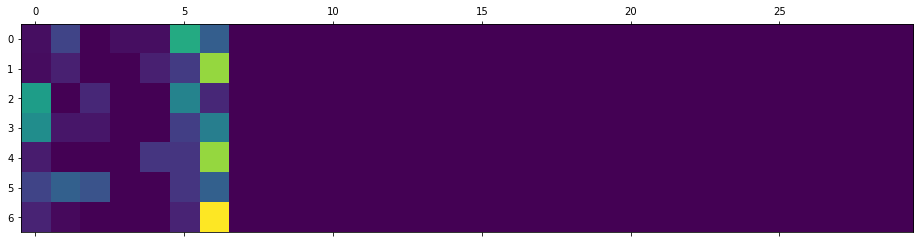

In [342]:
def ultimetric(clusterer):
    matrix = []
    #cell4 = [85, 161, 180, 189, 253, 300, 85, 161, 180, 189, 253, 300, 85, 161, 180, 189, 253, 300]
    #cell2 = [131, 141, 219, 289, 295, 298, 306, 313, 310, 315, 415, 101, 306, 313, 310, 315, 415, 101]
    #grosse = [190, 151, 192, 193, 195, 196, 225, 226, 227, 232, 237, 275, 277, 279, 3, 76, 113, 119, 117]
    #split = [296, 297, 308, 324, 341, 387, 389, 404, 20, 30, 116, 341, 387, 389, 404, 20, 30, 116, 30]

    #for items in [cell4, cell2, grosse, split]:
    #            matrix.append(np.bincount(clusterer.labels_[items]+1, minlength = 30))
    for lab in range(7):
        matrix.append(np.bincount(clusterer.labels_[labels_annotated==lab]+1, minlength=30))
    matrix = np.array(matrix)
    matrix = matrix/np.expand_dims(np.sum(matrix, axis = 1), -1)

    #print(matrix)
    #s1 = 0#np.mean(matrix.max(axis = 1)/[len(cell4), len(cell2), len(grosse), len(split)])
    return matrix
matrix = ultimetric(clusterer)
matrix = matrix/np.expand_dims(np.sum(matrix, axis = 1), -1)
plt.matshow(matrix)


120 10 pyfunc


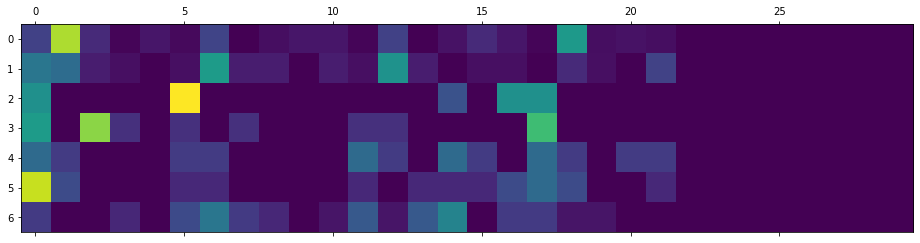

In [354]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dico = MiniBatchDictionaryLearning(n_components=80, alpha=1, n_iter=250, fit_algorithm="lars", random_state=1)
V = dico.fit(data).components_
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric= 'sokalsneath', min_cluster_size=5, min_samples=None, p=None)
transform_algorithm = "lars"#"threshold"
kwargs =  {"transform_n_nonzero_coefs": 2}#{"transform_alpha":0.1}
dico.set_params(transform_algorithm=transform_algorithm, **kwargs) 
code = dico.transform(data)
clusterer.fit(code)
np.sum(clusterer.labels_!=-1)/data.shape[0]
matrix = ultimetric(clusterer)
print(l, k, metric)
plt.matshow(matrix)
plt.show()

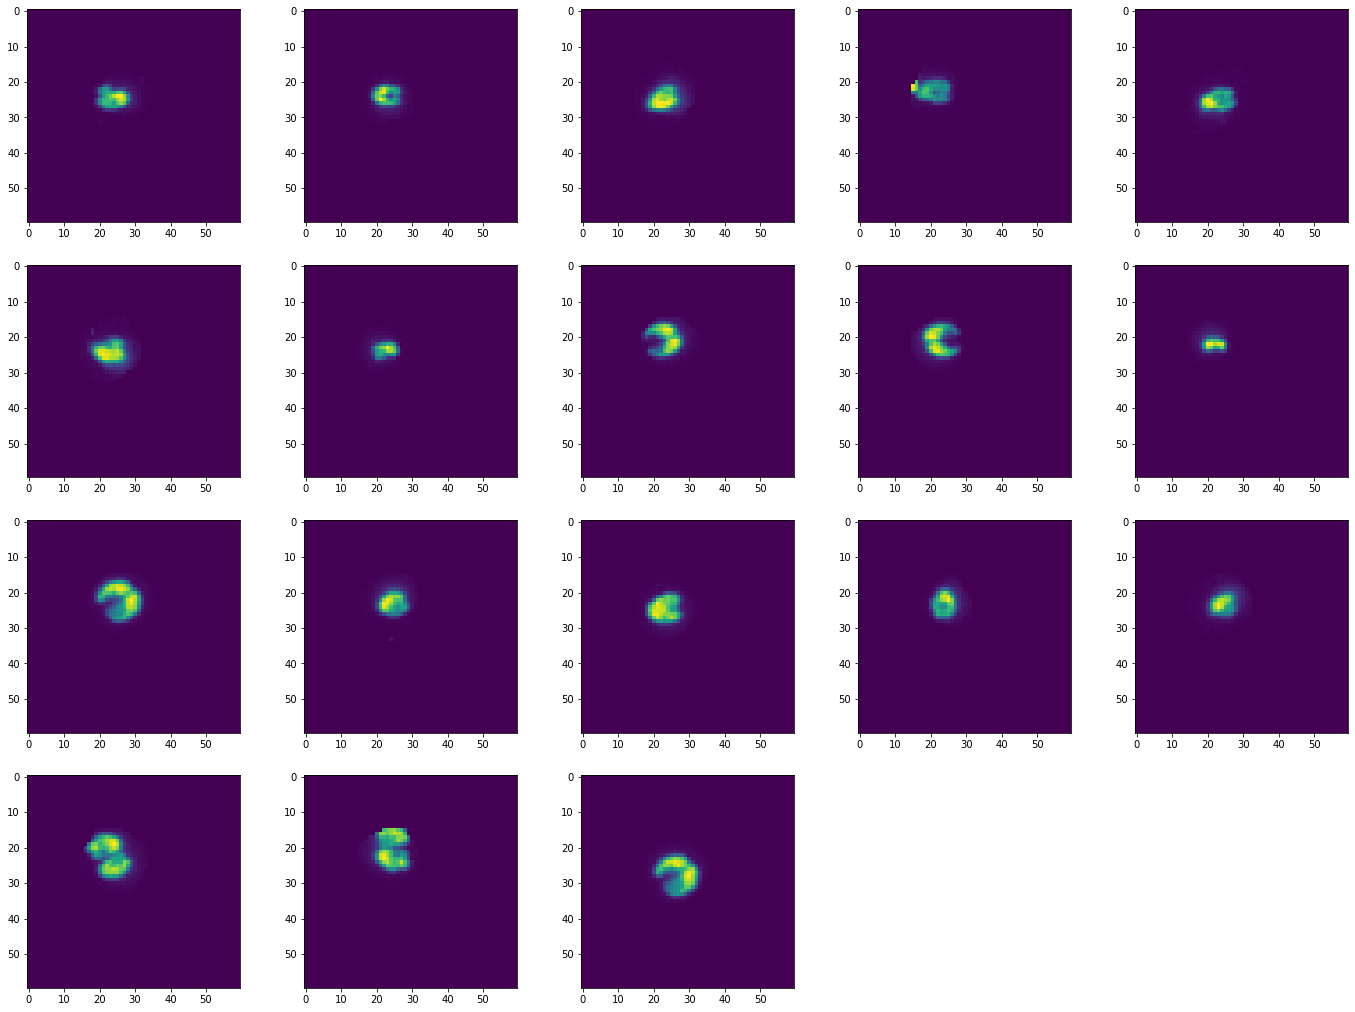

In [358]:
images = []
for i in range(code.shape[0]):
    if clusterer.labels_[i]==1:
        images.append(data[i].reshape((60,60)))
        
plot_images(np.array(images[:30]))

20
20 2 sokalsneath


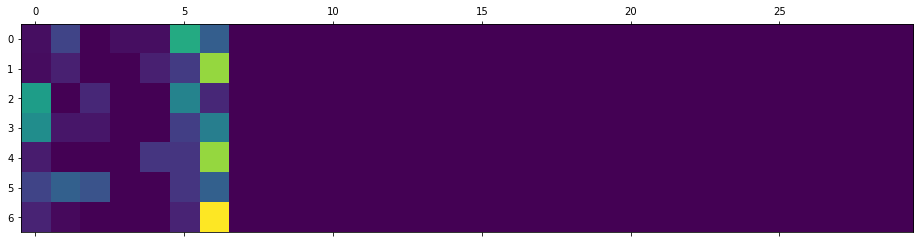

20 4 sokalsneath


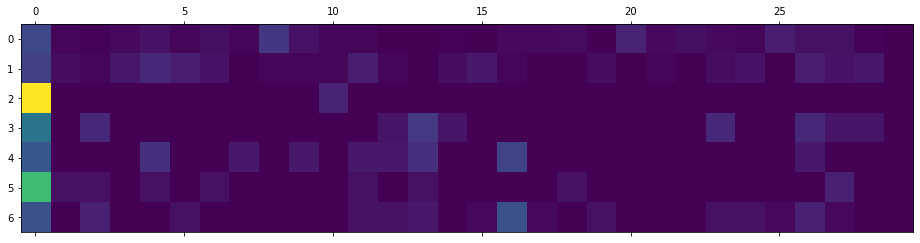

20 8 sokalsneath


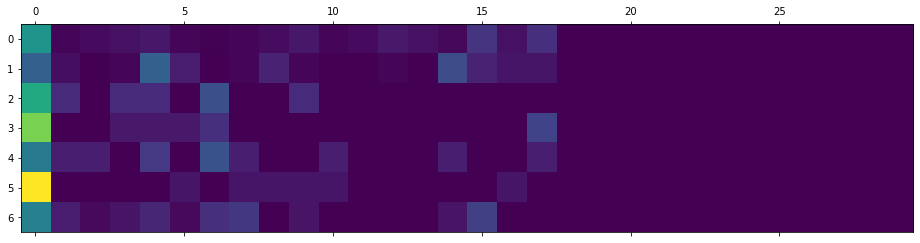

20 10 sokalsneath


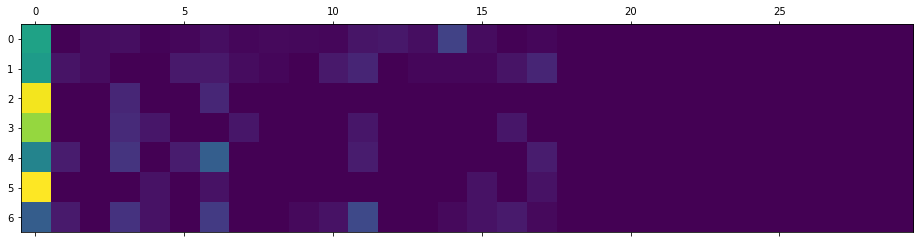

40
40 2 sokalsneath


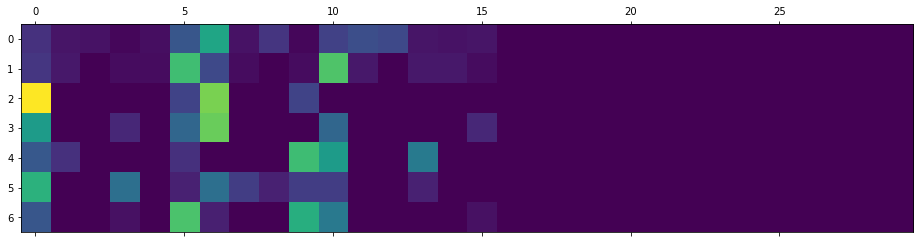

40 4 sokalsneath


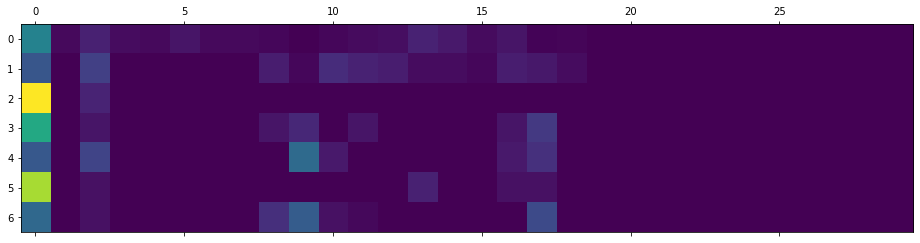

40 8 sokalsneath


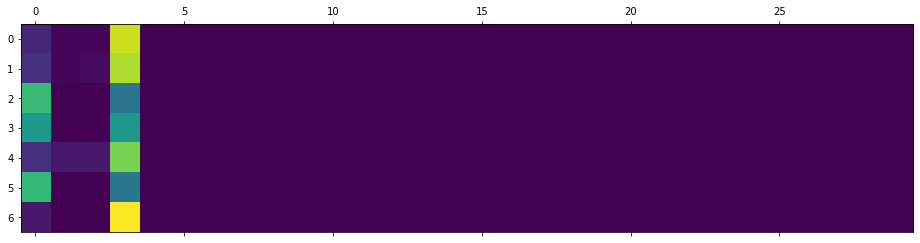

40 10 sokalsneath


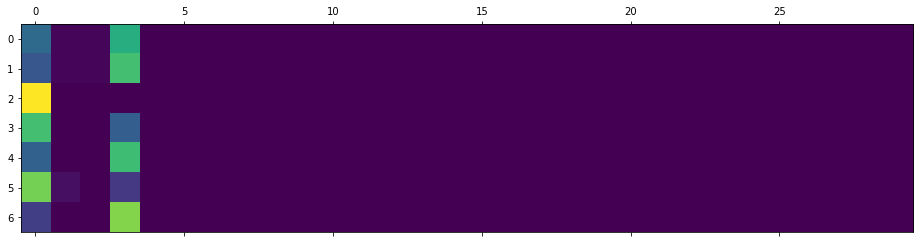

60
60 2 sokalsneath


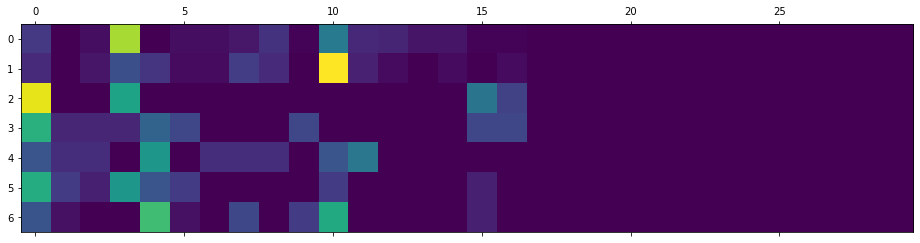

60 8 sokalsneath


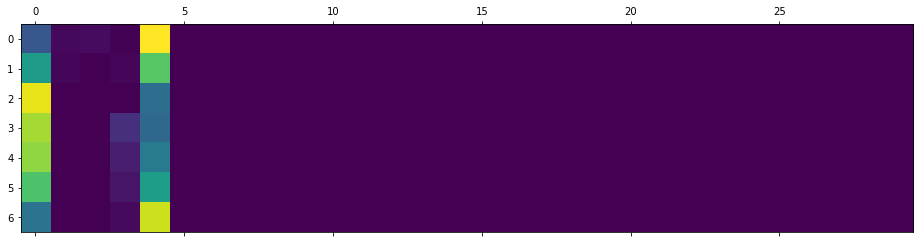

80
80 2 sokalsneath


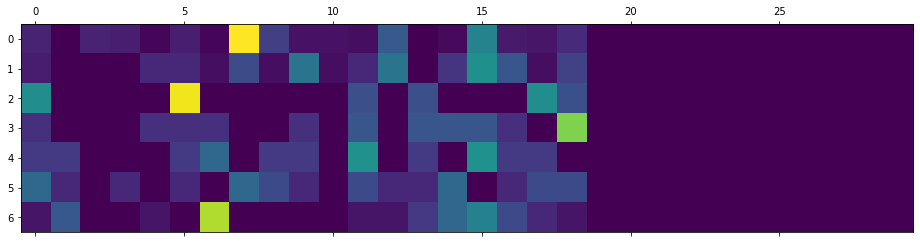

80 4 sokalsneath


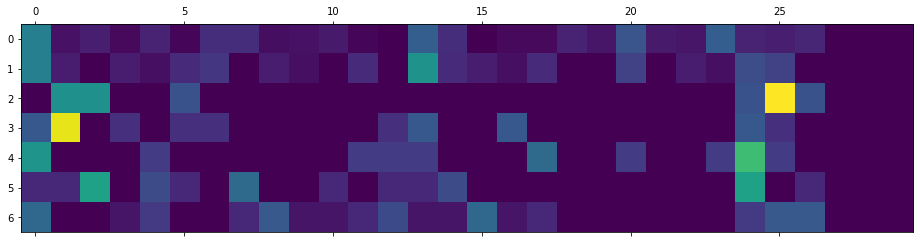

80 6 sokalsneath


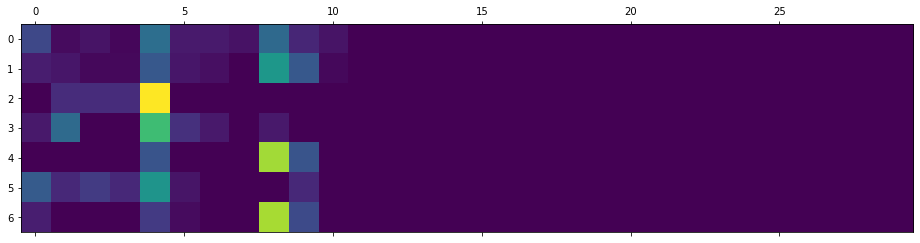

80 8 sokalsneath


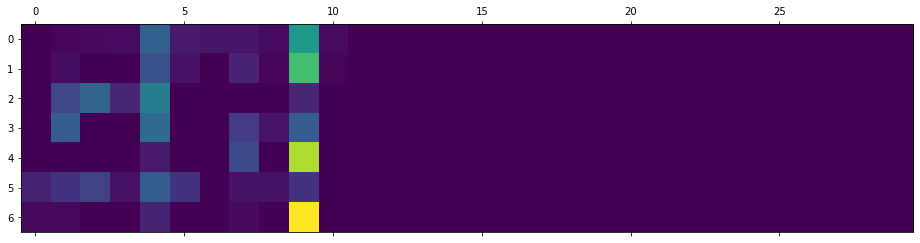

80 10 sokalsneath


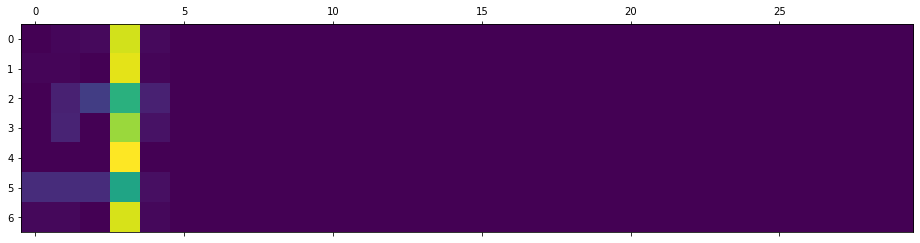

100
100 2 sokalsneath


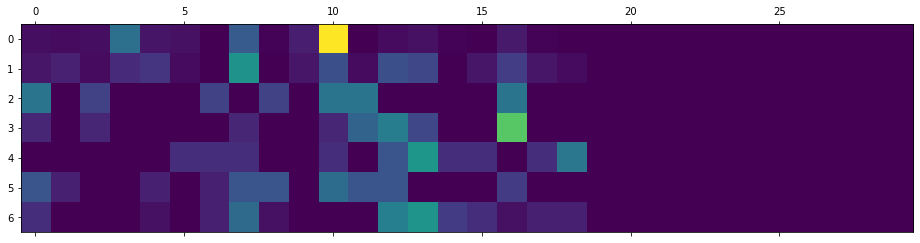

100 4 sokalsneath


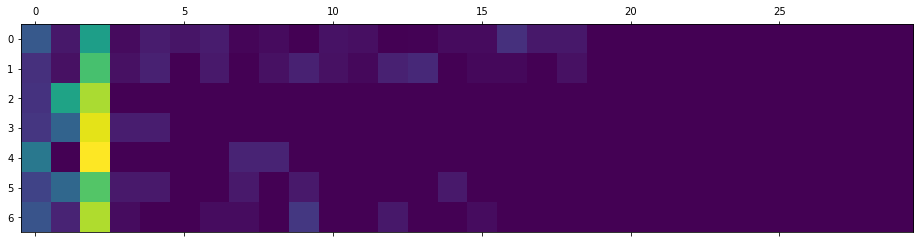

100 6 sokalsneath


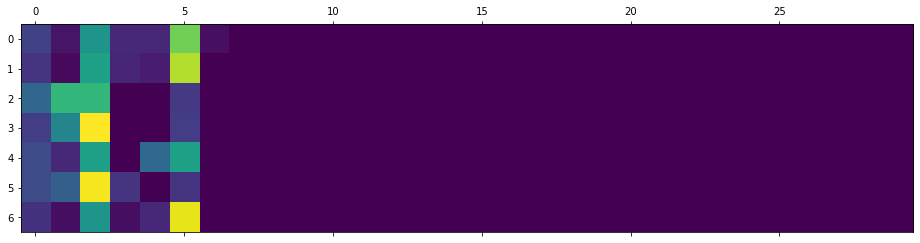

100 8 sokalsneath


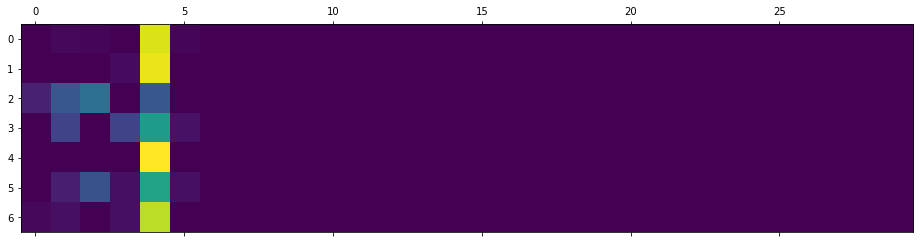

100 10 sokalsneath


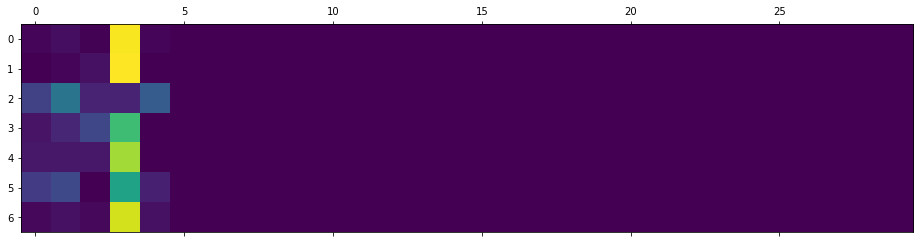

120
120 2 sokalsneath


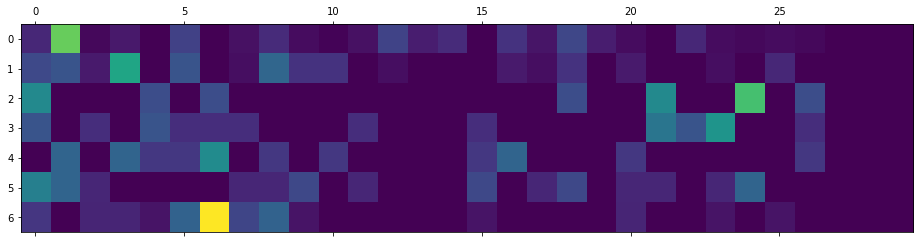

120 4 sokalsneath


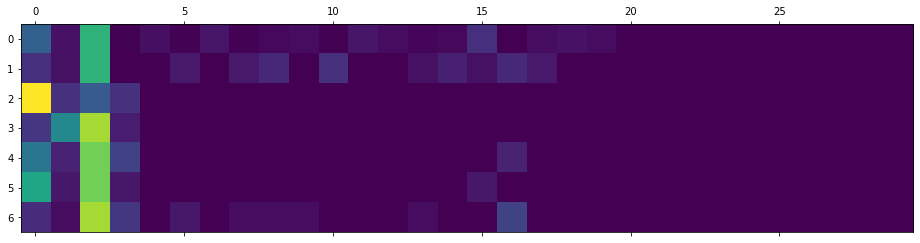

120 6 sokalsneath


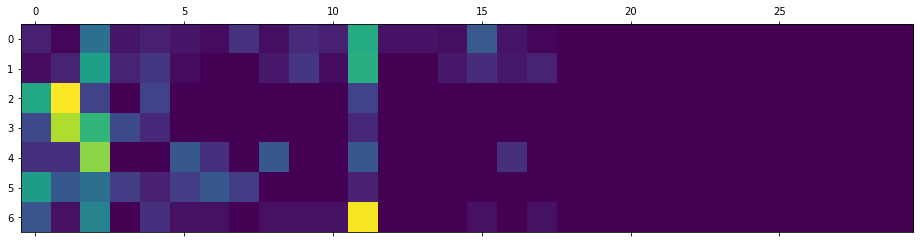

120 8 sokalsneath


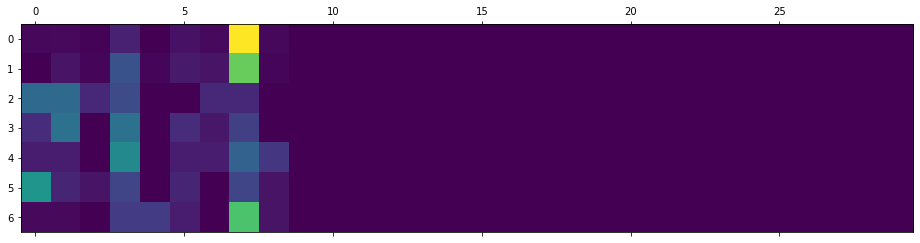

120 10 sokalsneath


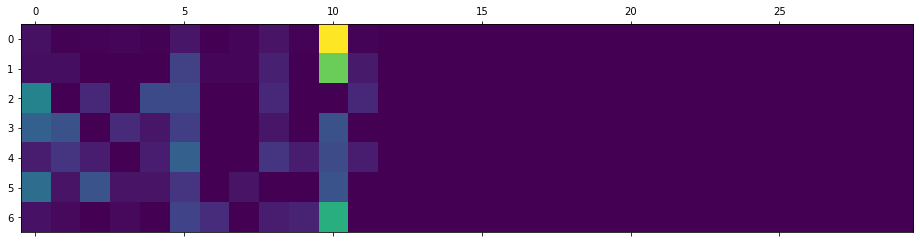

In [346]:
for l in [20, 40, 60, 80, 100, 120]:
    print(l)
    dico = MiniBatchDictionaryLearning(n_components=l, alpha=0.1, n_iter=250, fit_algorithm="lars", random_state=1)
    V = dico.fit(data).components_


    for k in [2, 4, 6, 8, 10]:


        for metric in hdbscan.dist_metrics.METRIC_MAPPING.keys():

            if metric == "sokalsneath":#not in ["seuclidean", 'mahalanobis', 'wminkowski', 'haversine', 'cosine', 'arccos', 'pyfunc', "minkowski"]:
                    clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
                        gen_min_span_tree=False, leaf_size=40,
                        metric= metric, min_cluster_size=5, min_samples=None, p=None)

                    transform_algorithm = "lars"#"threshold"
                    kwargs =  {"transform_n_nonzero_coefs": k}#{"transform_alpha":0.1}
                    dico.set_params(transform_algorithm=transform_algorithm, **kwargs) 
                    code = dico.transform(data)
                    clusterer.fit(code)
                    base =  np.sum(clusterer.labels_!=-1)/data.shape[0]
                    #print(k, metric,base) 
                    if base >0.5:
                        labels, counts = np.unique(clusterer.labels_,return_counts=True)
                        #print(counts)
                        matrix = ultimetric(clusterer)
                        print(l, k, metric)
                        plt.matshow(matrix)
                        plt.show()
                        #except:
                        #    pass

In [347]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric= "sokalmichener", min_cluster_size=5, min_samples=None, p=0.9)
clusterer.fit(code)

HDBSCAN(metric='sokalmichener', p=0.9)

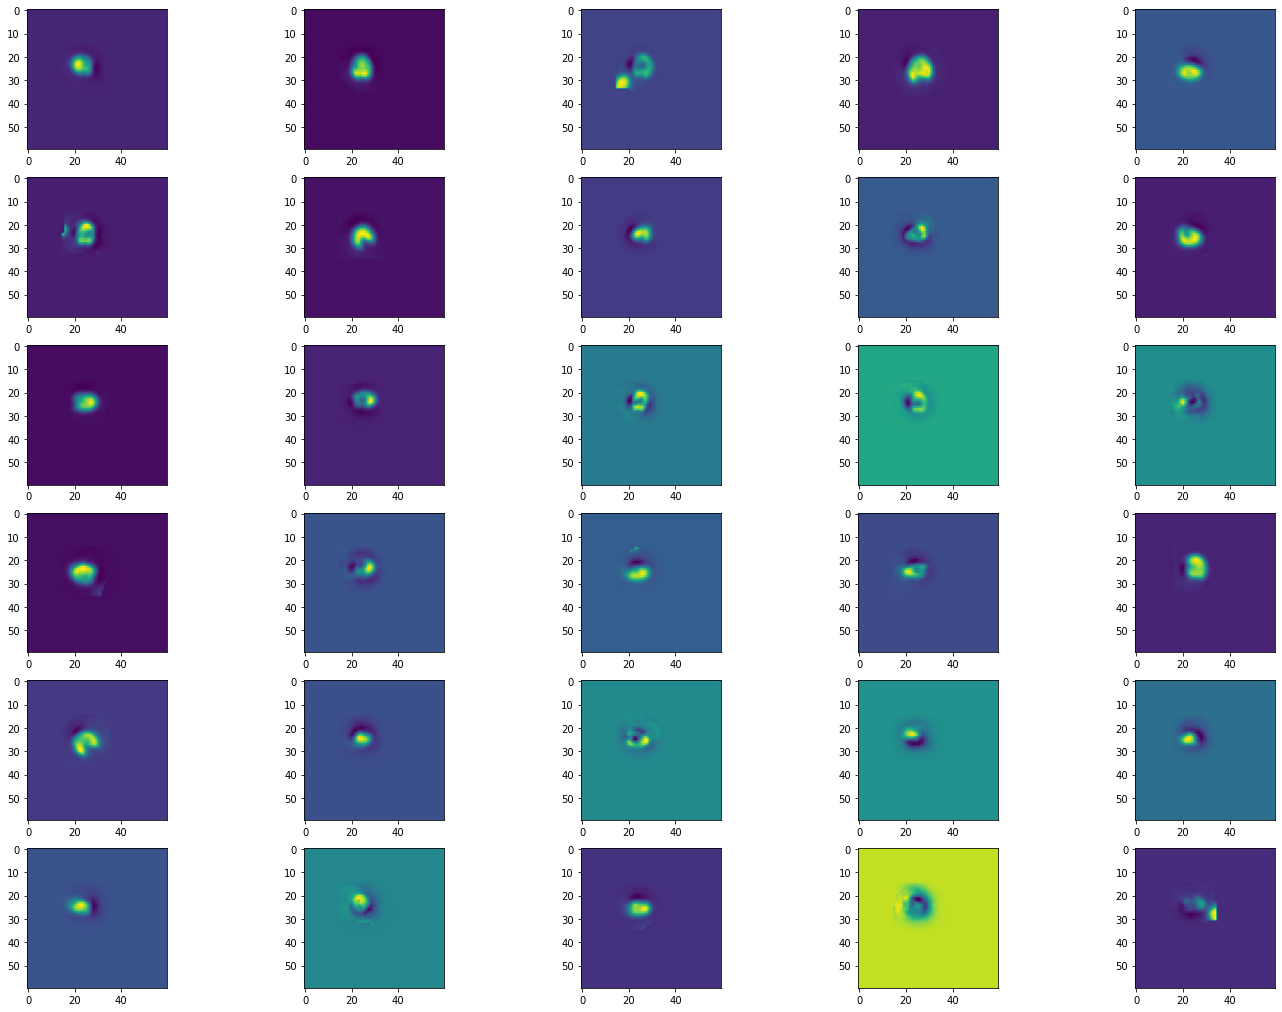

In [17]:
images = []
for i in range(code.shape[0]):
    if clusterer.labels_[i]==0:
        images.append(data[i].reshape((60,60)))
        
plot_images(np.array(images[:30]))

In [45]:

import math
import numpy as np
import matplotlib.pyplot as plt

def plot_images(np_images, titles = [], columns = 5, figure_size = (24, 18)):
    count = np_images.shape[0]
    rows = math.ceil(count / columns)

    fig = plt.figure(figsize=figure_size)
    subplots = []
    for index in range(count):
        subplots.append(fig.add_subplot(rows, columns, index + 1))
        if len(titles):
            subplots[-1].set_title(str(titles[index]))
        plt.imshow(np_images[index])

    plt.show()
    


In [115]:
cell4 = [85, 161, 180, 189, 253, 300]
cell2 = [131, 141, 219, 289, 295, 298, 306, 313, 310, 315, 415, 101]
grosse = [190, 151, 192, 193, 195, 196, 225, 226, 227, 232, 237, 275, 277, 279, 3, 76, 113, 119, 117]
split = [296, 297, 308, 324, 341, 387, 389, 404, 20, 30, 116]

array([ 2,  2,  2,  2,  2,  2,  0,  1,  2, -1,  2], dtype=int64)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

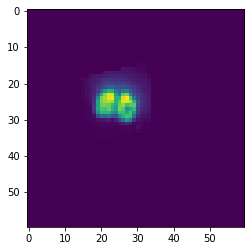

In [186]:
im_ref = data[141]
plt.figure()
plt.imshow(im_ref.reshape((60,60)))

In [157]:
data = np.load("images_algae.npy", allow_pickle = True)
data = np.concatenate(data)
data = data.reshape(data.shape[0], -1)
M = np.expand_dims(np.mean(data, axis=1),-1)
S = np.expand_dims(np.std(data, axis = 1), -1)
data -= M
data /= S
data = data.reshape(data.shape[0], 60, 60)

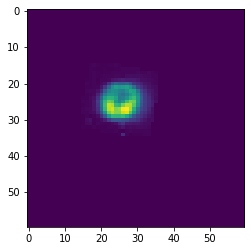

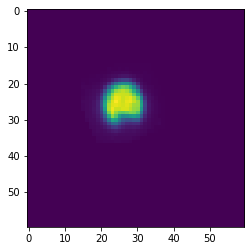

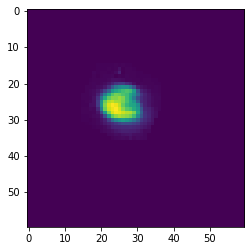

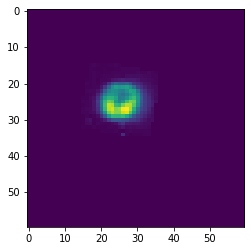

In [194]:
ref = data[298]
plt.imshow(ref)
for D in data:
    fac = np.mean(ref*D)
    if fac >0.95:
        plt.figure()
        plt.imshow(D)
    

In [198]:
from sklearn.decomposition import PCA
data = data.reshape(data.shape[0], -1)

pca = PCA(n_components=5)
pca.fit(data)
X = pca.transform(data)


0.17422434367541767
120 373 euclidean 0.9868421052631579


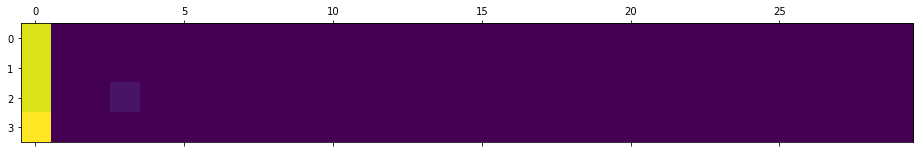

0.17422434367541767
120 373 l2 0.9868421052631579


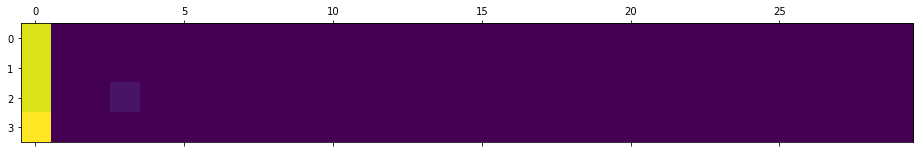

0.17422434367541767
120 373 p 0.9868421052631579


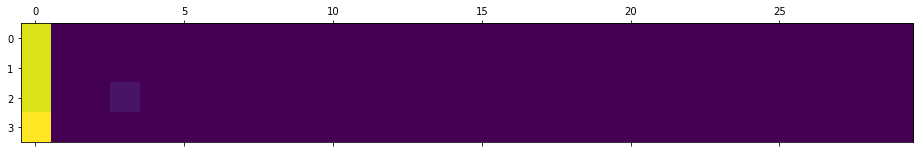

0.11217183770883055
120 373 manhattan 1.0


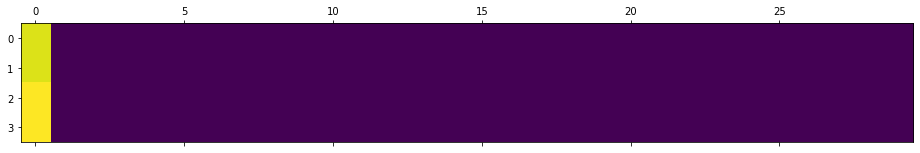

0.11217183770883055
120 373 cityblock 1.0


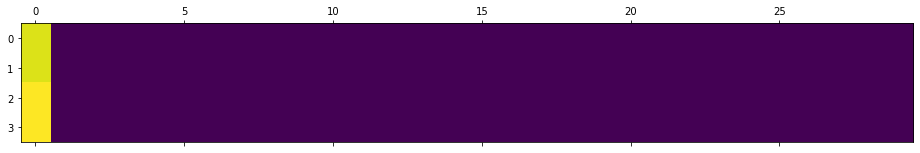

0.11217183770883055
120 373 l1 1.0


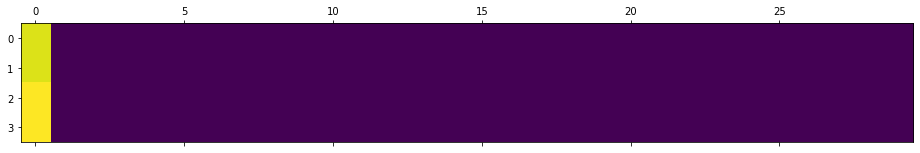

0.47494033412887826
120 373 chebyshev 0.868421052631579


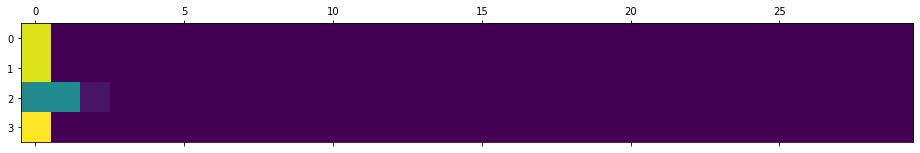

0.47494033412887826
120 373 infinity 0.868421052631579


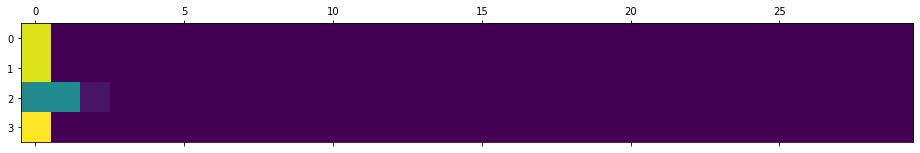

0.0
120 373 hamming 1.0


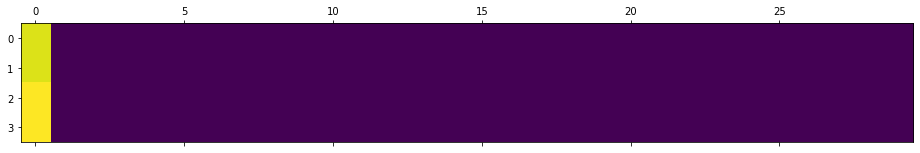

0.3747016706443914
120 373 canberra 0.7733918128654971


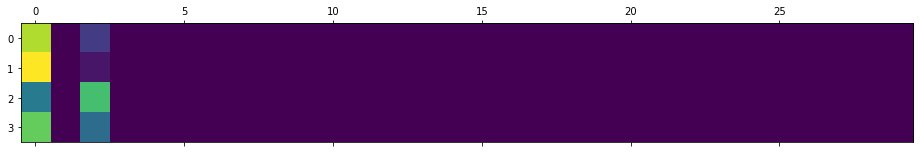

0.8758949880668258
120 373 braycurtis 0.6710526315789473


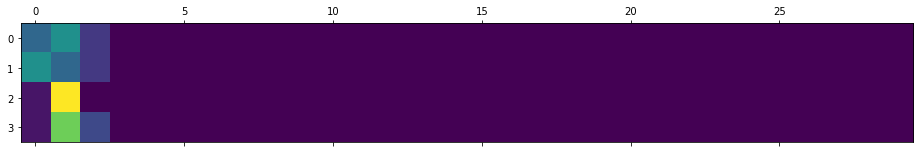

0.0
120 373 matching 1.0


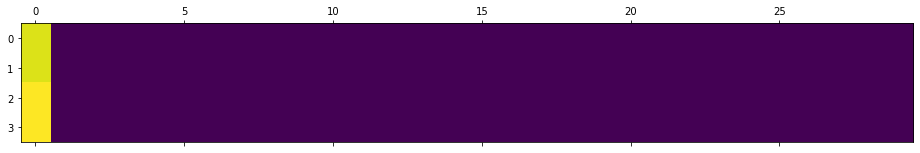

0.0
120 373 jaccard 1.0


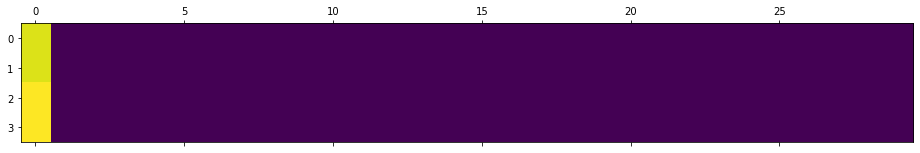

0.0
120 373 dice 1.0


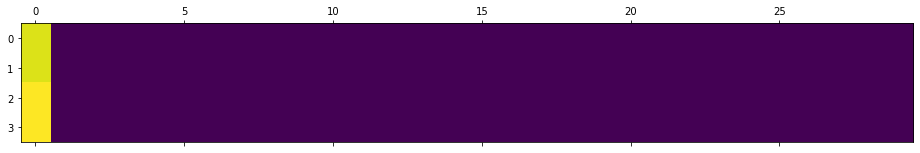

0.0
120 373 kulsinski 1.0


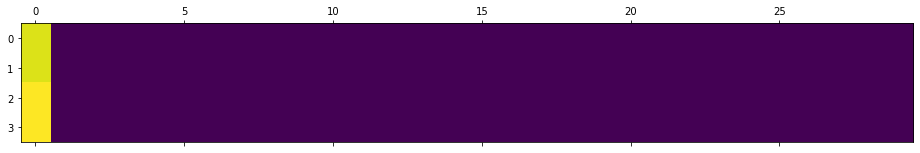

0.0
120 373 rogerstanimoto 1.0


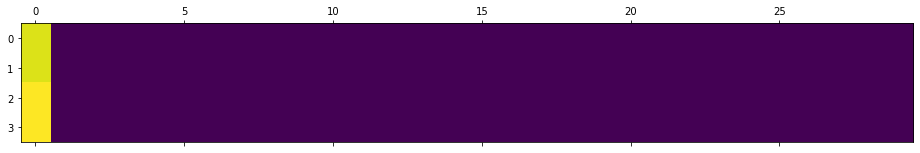

0.0
120 373 russellrao 1.0


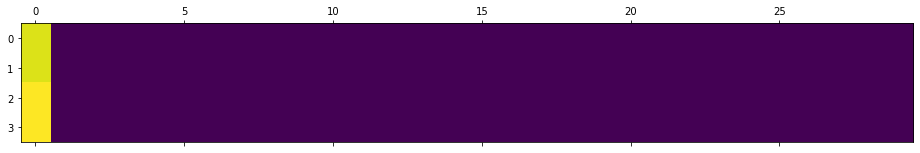

0.0
120 373 sokalmichener 1.0


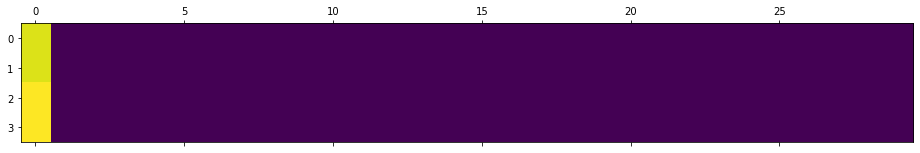

0.0
120 373 sokalsneath 1.0


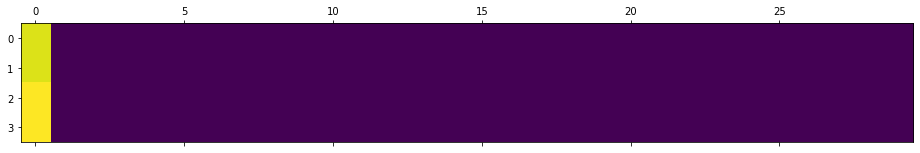

In [216]:
for metric in hdbscan.dist_metrics.METRIC_MAPPING.keys():
    if metric not in ["seuclidean", 'mahalanobis', 'wminkowski', 'haversine', 'cosine', 'arccos', 'pyfunc', "minkowski"]:
        clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
            gen_min_span_tree=False, leaf_size=40,
            metric= metric, min_cluster_size=5, min_samples=None, p=0.9)
        pca = PCA(n_components=20)
        pca.fit(data)
        X = pca.transform(data)

        clusterer.fit(X)
        print(np.sum(clusterer.labels_!=-1)/data.shape[0])
        s1, matrix = ultimetric(clusterer)
        print(l, k, metric, s1)
        plt.matshow(matrix)
        plt.show()

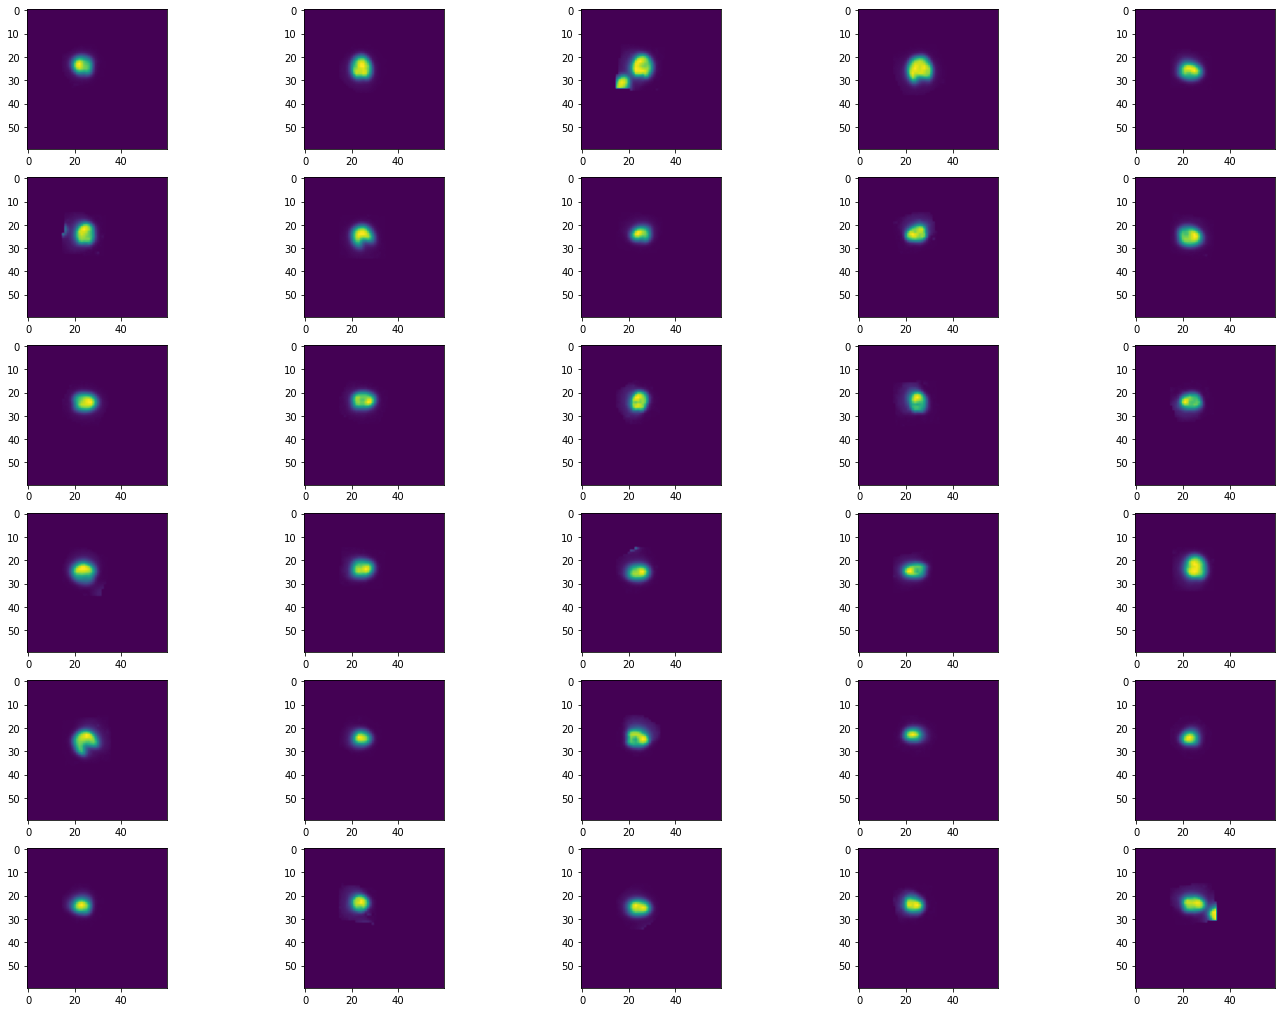

In [271]:
images = []
for i in range(code.shape[0]):
        images.append(data[i].reshape((60,60)))
        
plot_images(np.array(images[:30]))

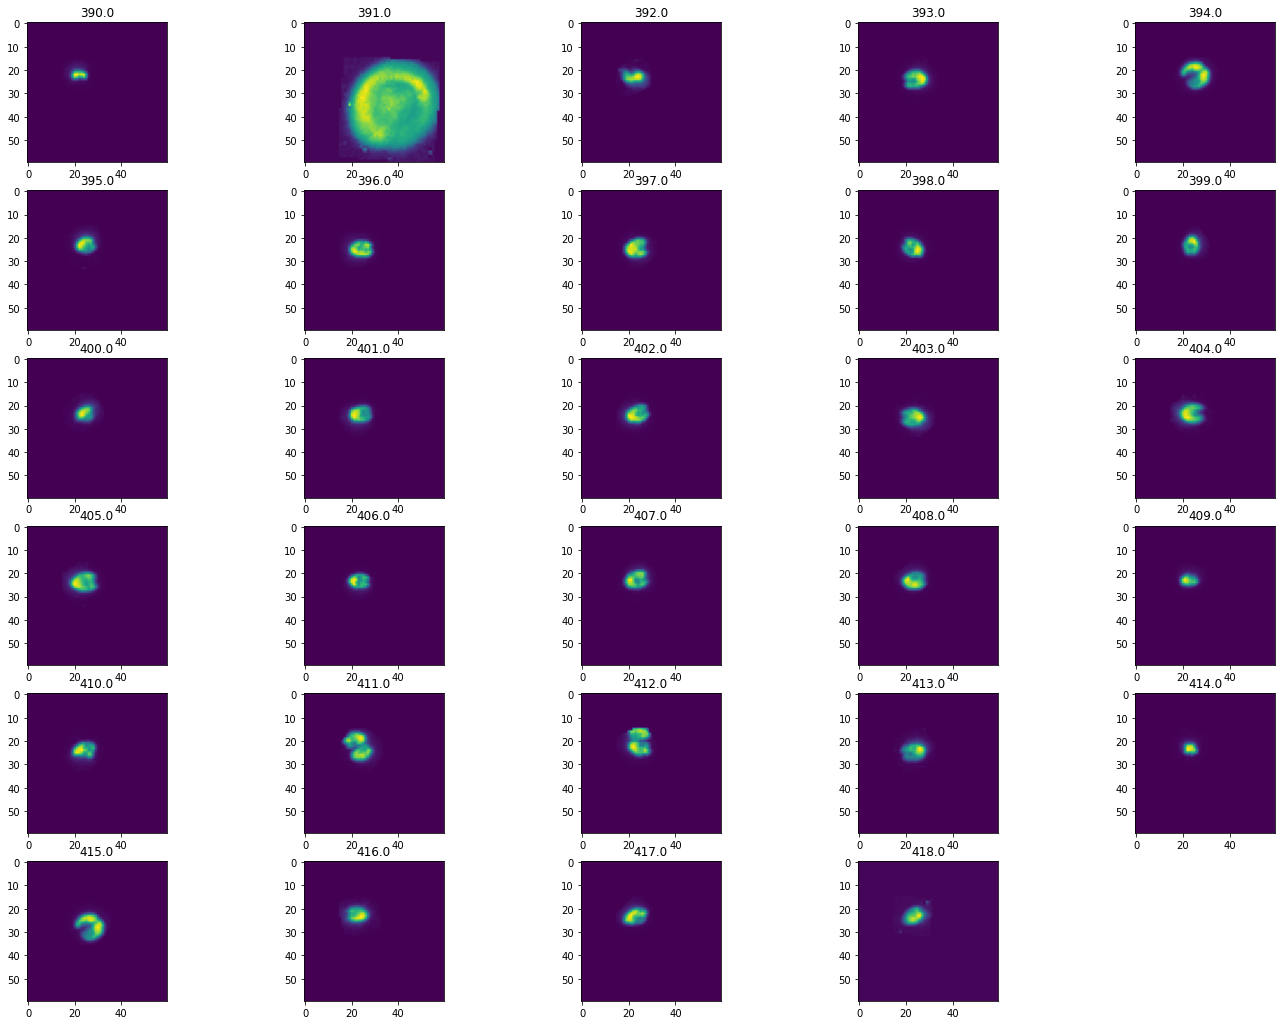

In [291]:
start, stop = 390, 420
titles = np.linspace(start, stop-1, stop-start)
plot_images(np.array(images[start:stop]), titles)

In [341]:
from numpy import genfromtxt
labels_annotated = genfromtxt("labels_annotated3.csv" , delimiter=',')

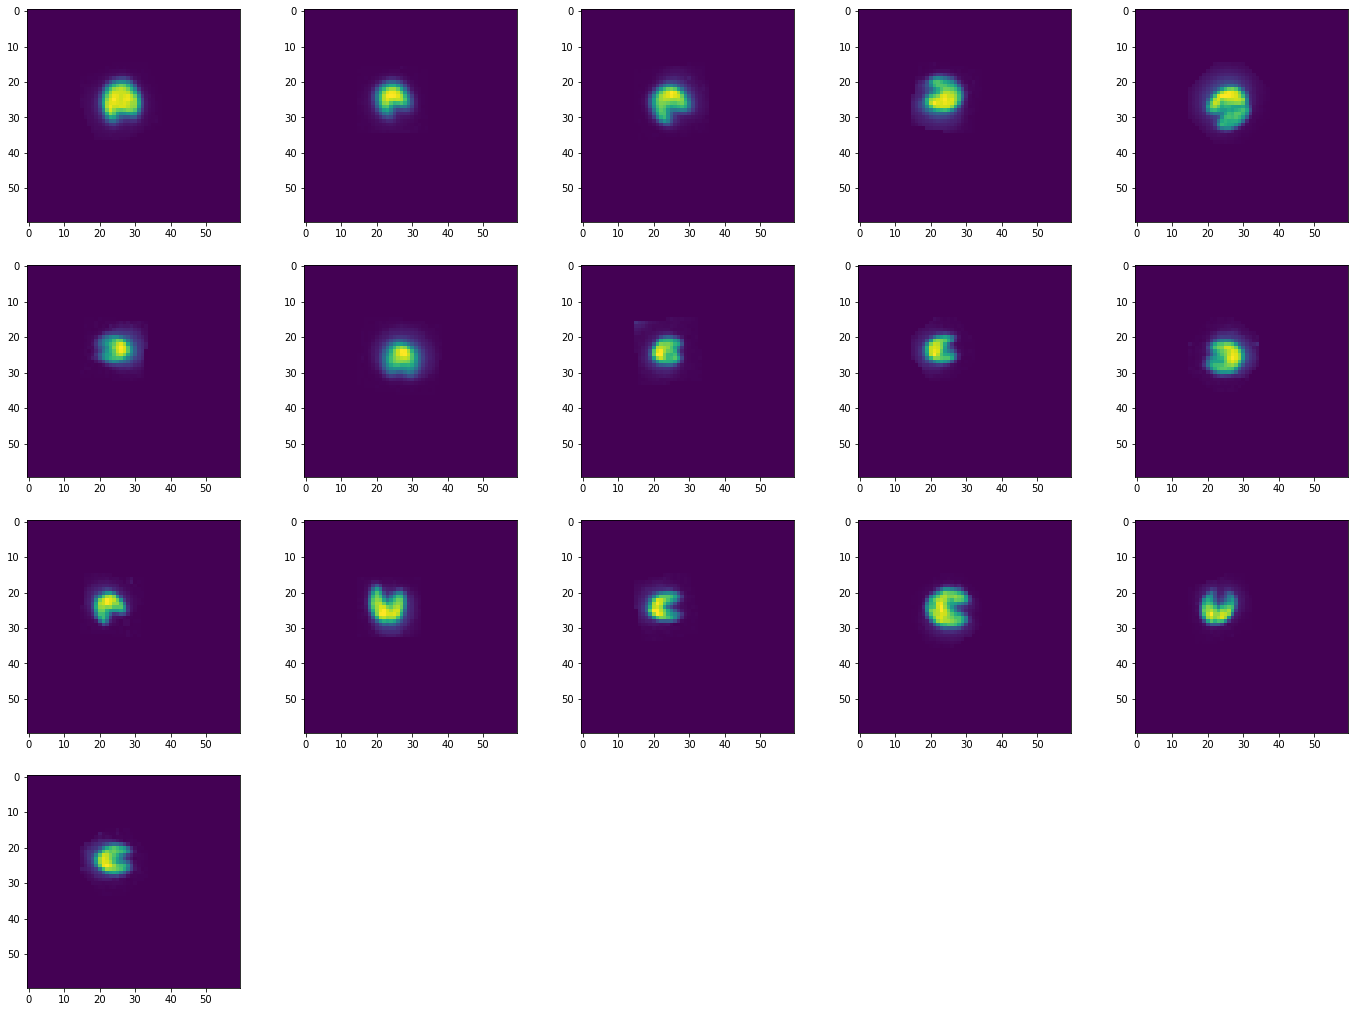

In [322]:
images = []
for i in range(code.shape[0]):
    if labels[i]==4:
        images.append(data[i].reshape((60,60)))
        
plot_images(np.array(images[:30]))

##### 